# Pothole Detection

As we are all aware that Tesla's quest for Self Driving Cars, and we are aware these cars are being developed not just for safety issues of car riders but also to make their journey more comfortable.So, in order to provide comfortable journey it should be able to detect potholes and avoid them. 

## Importing the Dataste


In [ ]:
# This will load the dataset.You will see a folder called ALL in your workspace.
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/arya.ashish/dataset.zip"
!unzip -qo dataset.zip 
!rm dataset.zip

## Importing the libraries

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from keras.layers import Dense, Flatten, AveragePooling2D, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

## Data Visulization

In [2]:
data_path = "My Dataset/"

In [3]:
# Check images
img = cv2.imread(data_path+"train"+'/'+"Pothole"+"/"+"131.pothole.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

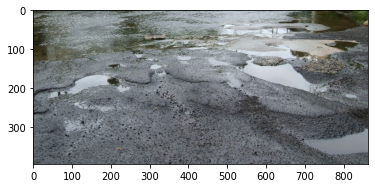

In [4]:
# pothole 
plt.imshow(img)

In [5]:
img.shape

(396, 863, 3)

## Dataset Generation

In [6]:
# Data agumentation on train and test

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
# create dataset train
training_set = train_datagen.flow_from_directory(data_path + 'train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

Found 354 images belonging to 2 classes.


In [8]:
# Create test data set
test_set = test_datagen.flow_from_directory(data_path + 'test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 16 images belonging to 2 classes.


## Model Architecture 

In [9]:
# Model creation with changes

model = VGG16(input_shape=(224,224,3),include_top=False)

for layer in model.layers:
    layer.trainable = False

newModel = model.output
newModel = AveragePooling2D()(newModel)
newModel = Flatten()(newModel)
newModel = Dense(128, activation="relu")(newModel)
newModel = Dropout(0.5)(newModel)
newModel = Dense(2, activation='softmax')(newModel)

model = Model(inputs=model.input, outputs=newModel)

In [10]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

## Model Training

In [11]:
opt=Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(training_set,
                              validation_data=test_set,
                              epochs=10)    

Epoch 1/10
23/23 [==============================] - 88s 4s/step - loss: 0.6544 - accuracy: 0.6582 - val_loss: 0.4925 - val_accuracy: 0.8750
Epoch 2/10
23/23 [==============================] - 87s 4s/step - loss: 0.4303 - accuracy: 0.8362 - val_loss: 0.4490 - val_accuracy: 0.7500
Epoch 3/10
23/23 [==============================] - 87s 4s/step - loss: 0.3006 - accuracy: 0.9040 - val_loss: 0.3712 - val_accuracy: 0.7500
Epoch 4/10
23/23 [==============================] - 87s 4s/step - loss: 0.2600 - accuracy: 0.9124 - val_loss: 0.3839 - val_accuracy: 0.8125
Epoch 5/10
23/23 [==============================] - 87s 4s/step - loss: 0.2285 - accuracy: 0.9209 - val_loss: 0.3450 - val_accuracy: 0.7500
Epoch 6/10
23/23 [==============================] - 86s 4s/step - loss: 0.2136 - accuracy: 0.9181 - val_loss: 0.3736 - val_accuracy: 0.7500
Epoch 7/10
23/23 [==============================] - 86s 4s/step - loss: 0.1967 - accuracy: 0.9407 - val_loss: 0.3455 - val_accuracy: 0.7500
Epoch 8/10
23/23 [==

## Tarining Curves

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

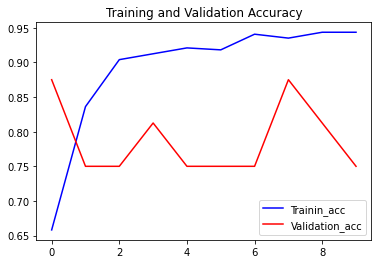

In [14]:
plt.plot(epochs,acc,label='Trainin_acc',color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

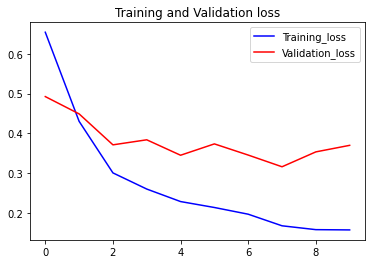

In [15]:
plt.plot(epochs,loss,label='Training_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

## Accessing Model Performance

In [16]:
class_dict = {0:'Plain',
              1:'Pothole'}

Plain Road Detected


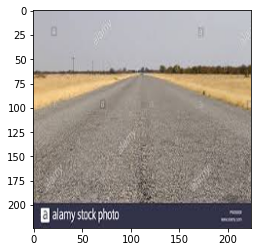

In [21]:
# New Data for testing 

file_path =  'My Dataset/test/Plain/2.jpg'
test_image = cv2.imread(file_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

if (pred_class == 'Plain'):
    print('Plain Road Detected')
else:
    print('Pothole Detected')

Pothole Detected


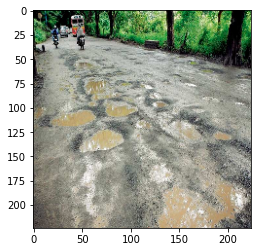

In [20]:
# New Data for testing 

file_path =  'My Dataset/test/Pothole/2.jpg'
test_image = cv2.imread(file_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

if (pred_class == 'Plain'):
    print('Plain Road Detected')
else:
    print('Pothole Detected')

## Saving the Model

In [22]:
model.save("PD_model.h5")

## Compiling the Model with DeepC Compiler

In [23]:
!deepCC PD_model.h5

reading [keras model] from 'PD_model.h5'
Saved 'PD_model.onnx'
reading onnx model from file  PD_model.onnx
Model info:
  ir_vesion :  5 
  doc       : 
WARN (ONNX): graph-node block1_conv1's attribute auto_pad has no meaningful data.
WARN (ONNX): graph-node block1_conv2's attribute auto_pad has no meaningful data.
WARN (ONNX): graph-node block2_conv1's attribute auto_pad has no meaningful data.
WARN (ONNX): graph-node block2_conv2's attribute auto_pad has no meaningful data.
WARN (ONNX): graph-node block3_conv1's attribute auto_pad has no meaningful data.
WARN (ONNX): graph-node block3_conv2's attribute auto_pad has no meaningful data.
WARN (ONNX): graph-node block3_conv3's attribute auto_pad has no meaningful data.
WARN (ONNX): graph-node block4_conv1's attribute auto_pad has no meaningful data.
WARN (ONNX): graph-node block4_conv2's attribute auto_pad has no meaningful data.
WARN (ONNX): graph-node block4_conv3's attribute auto_pad has no meaningful data.
WARN (ONNX): graph-node bloc